In [64]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')



In [33]:
from google.colab import files
df= files.upload()

Saving train.csv to train (1).csv


In [34]:
import io
df2 = pd.read_csv(io.BytesIO(df['train.csv']))

In [35]:
df2.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [36]:
df2.shape

(2000, 21)

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [38]:
df2.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [39]:
df2.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


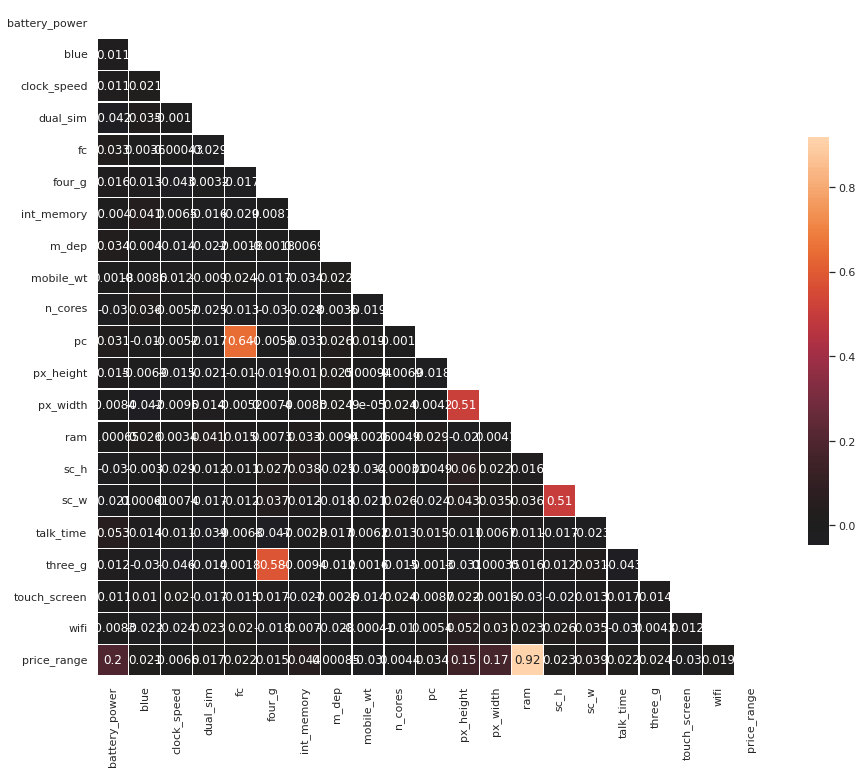

In [40]:
sns.set_theme(style="white")

corr = df2.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(230, 20)

sns.heatmap(corr, mask=mask, center=0, annot=True,
            square=True, linewidths=.3,cbar_kws={"shrink": 0.5}) 

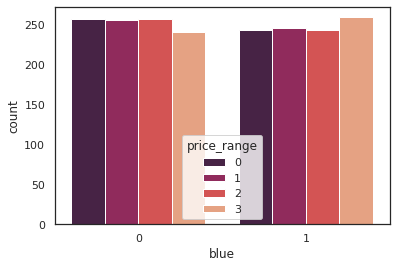

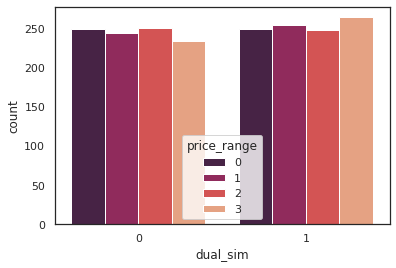

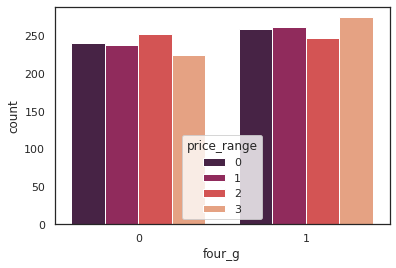

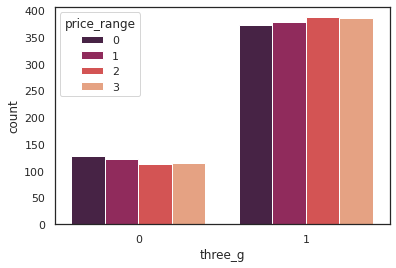

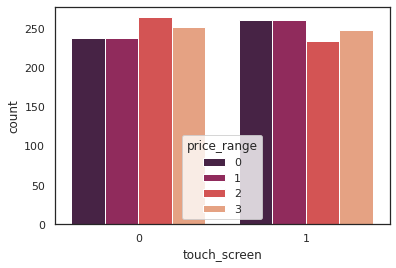

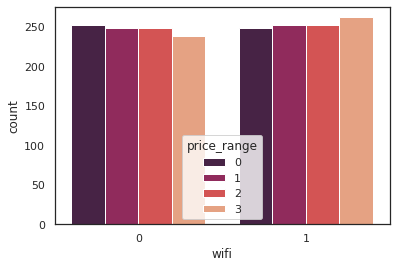

In [41]:
binary_col = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']
for i in binary_col:
    ax = sns.countplot(x=i, hue='price_range',data=df2,palette='rocket')
    plt.show()

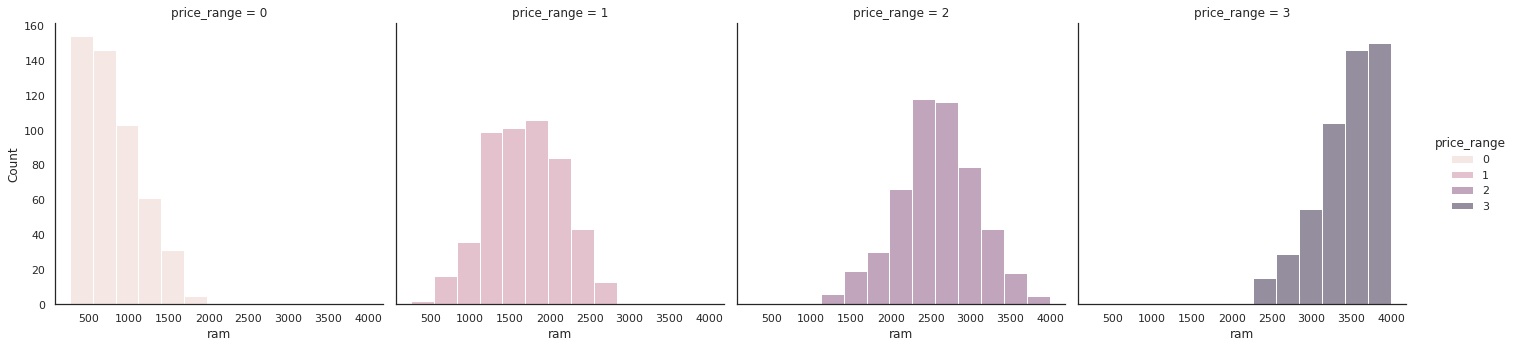

In [42]:
sns.displot(data=df2, x="ram", hue="price_range", col="price_range")
plt.show()

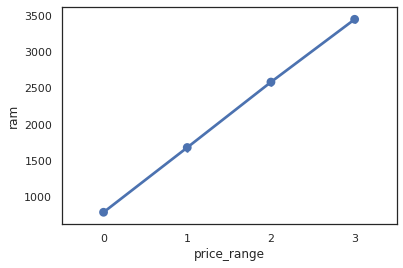

In [43]:
sns.pointplot(x='price_range',y='ram',data=df2)
plt.show()

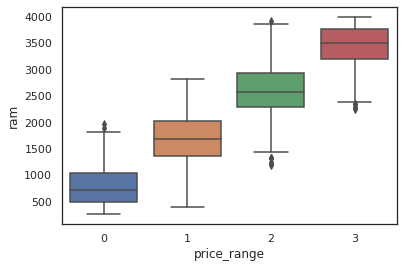

In [44]:
sns.boxplot(x='price_range',y='ram',data=df2)
plt.show()

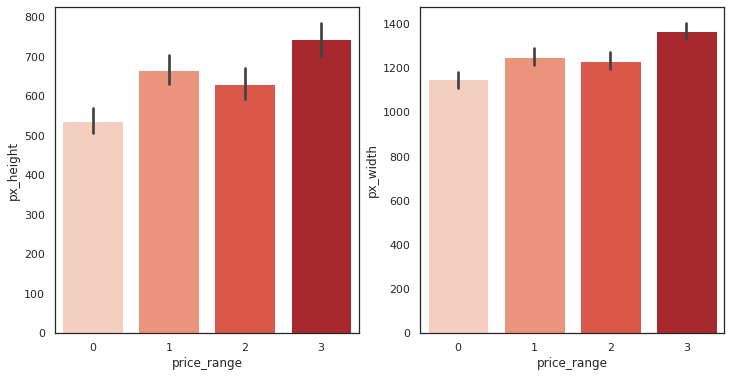

In [45]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(x='price_range',y='px_height',data=df2,palette='Reds')
plt.subplot(1,2,2)
sns.barplot(x='price_range',y='px_width',data=df2,palette='Reds')
plt.show()

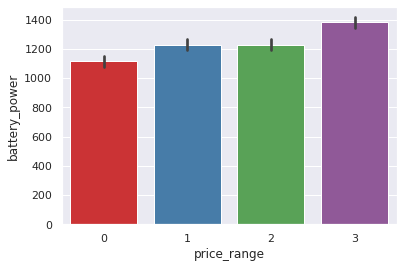

In [46]:
sns.set_style('darkgrid')
sns.set_palette('Set1')
sns.barplot(x='price_range',y='battery_power',data=df2)
plt.show()

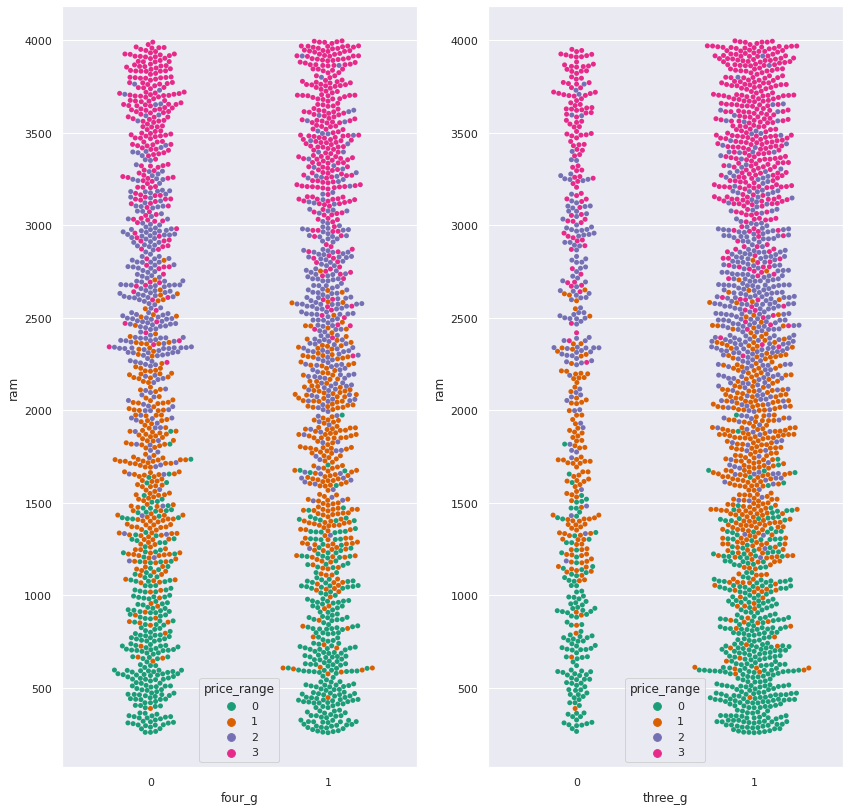

In [47]:
f, ax = plt.subplots(figsize=(14, 14))
plt.subplot(1,2,1)
ax=sns.swarmplot(x="four_g", y="ram", hue="price_range",
              palette="Dark2", data=df2)
ax=sns.set(style="darkgrid")
plt.subplot(1,2,2)
ax=sns.swarmplot(x="three_g", y="ram", hue="price_range",
              palette="Dark2", data=df2)
ax=sns.set(style="darkgrid")

In [48]:
x=df2.drop(['price_range'],axis=1)
y=df2['price_range']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_test.shape,  y_test.shape)

Train set: (1600, 20) (1600,)
Validation set: (400, 20) (400,)


In [50]:
#KNN

k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9525
Test set Accuracy:  0.945


In [51]:
x_new=[[1800,0,0.5,1,4,0,10,0.7,135,4,6,20,1988,1000,17,3,7,0,0,0]]
ynew = neigh.predict(x_new)
print(ynew)

[1]


In [58]:
def model_evaluation(model, X_train, y_train, X_test, y_test):
    
    print('Starting ...')
    
    ss = StandardScaler()
    X_train_ss = ss.fit_transform(X_train)
    X_test_ss = ss.fit_transform(X_test)
    print("Scaling process is done ...")
    
    print("**********************************")
    
    print("Model building process is started ...")
    mod = model.fit(X_train, y_train)
    mod_pred = model.predict(X_test)
    print("Model creation process is done ...")
    print("**********************************")
    print("Evaluation of the Model")
    print("***********************************")
    
    print("Classification report of the Model: \n {}".format(classification_report(y_test, mod_pred)))
    print("Confusion Matrix of the given Model: \n {}".format(confusion_matrix(y_test, mod_pred)))
    print("Accuracy score of the Model: \n{}".format(accuracy_score(y_test, mod_pred)))
    
    print("Evaluation process is done ...")
    
    print("***********************************************")
    
    return mod

In [65]:
rfc = RandomForestClassifier()
model_evaluation(rfc, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       106
           1       0.84      0.80      0.82       101
           2       0.77      0.84      0.80        87
           3       0.95      0.93      0.94       106

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

Confusion Matrix of the given Model: 
 [[100   6   0   0]
 [  5  81  15   0]
 [  0   9  73   5]
 [  0   0   7  99]]
Accuracy score of the Model: 
0.8825
Evaluation process is done ...
***********************************************


RandomForestClassifier()

In [66]:
dtc = DecisionTreeClassifier()
model_evaluation(dtc, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       106
           1       0.81      0.73      0.77       101
           2       0.70      0.76      0.73        87
           3       0.89      0.90      0.89       106

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400

Confusion Matrix of the given Model: 
 [[98  8  0  0]
 [10 74 17  0]
 [ 0  9 66 12]
 [ 0  0 11 95]]
Accuracy score of the Model: 
0.8325
Evaluation process is done ...
***********************************************


DecisionTreeClassifier()

In [67]:
svc = SVC()
model_evaluation(svc, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       106
           1       0.94      0.99      0.97       101
           2       0.98      0.93      0.95        87
           3       0.99      0.98      0.99       106

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.97       400

Confusion Matrix of the given Model: 
 [[105   1   0   0]
 [  1 100   0   0]
 [  0   5  81   1]
 [  0   0   2 104]]
Accuracy score of the Model: 
0.975
Evaluation process is done ...
***********************************************


SVC()

In [69]:
KNN =KNeighborsClassifier()
model_evaluation(KNN, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       106
           1       0.92      0.97      0.94       101
           2       0.90      0.92      0.91        87
           3       0.98      0.92      0.95       106

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.95      0.94      0.95       400

Confusion Matrix of the given Model: 
 [[102   4   0   0]
 [  2  98   1   0]
 [  0   5  80   2]
 [  0   0   8  98]]
Accuracy score of the Model: 
0.945
Evaluation process is done ...
***********************************************


KNeighborsClassifier()

In [71]:
lr=LogisticRegression()
model_evaluation(lr, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       106
           1       0.60      0.59      0.60       101
           2       0.49      0.52      0.50        87
           3       0.74      0.75      0.74       106

    accuracy                           0.67       400
   macro avg       0.66      0.66      0.66       400
weighted avg       0.67      0.67      0.67       400

Confusion Matrix of the given Model: 
 [[84 21  1  0]
 [17 60 19  5]
 [ 0 19 45 23]
 [ 0  0 27 79]]
Accuracy score of the Model: 
0.67
Evaluation process is done ...
***********************************************


LogisticRegression()

In [79]:
knn_acc=accuracy_score(y_test, KNN.predict(X_test))
dtc_acc=accuracy_score(y_test, dtc.predict(X_test))
lr_acc=accuracy_score(y_test, lr.predict(X_test))
svc_acc=accuracy_score(y_test, svc.predict(X_test))
rfc_acc=accuracy_score(y_test, rfc.predict(X_test))
models = pd.DataFrame({
    'Model': ['KNN','SVC','lr','rfc','dtc'],
    'Score': [knn_acc, svc_acc, lr_acc, rfc_acc, dtc_acc]})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,SVC,0.9750
0,KNN,0.9450
3,rfc,0.8825
4,dtc,0.8325
2,lr,0.6700


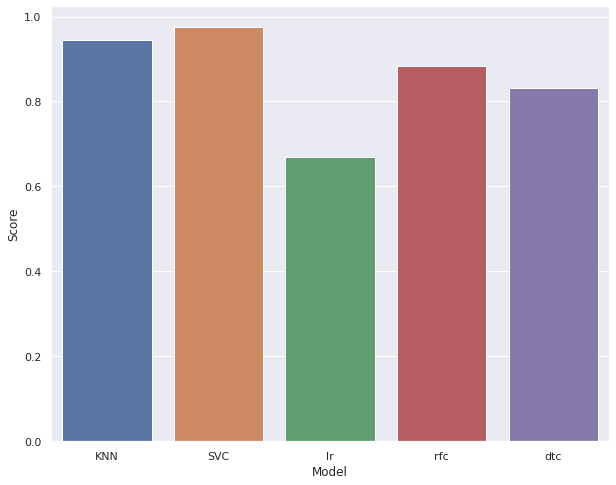

In [80]:
plt.figure(figsize=(10,8))
sns.barplot(x='Model',y='Score',data=models)

In [81]:
#Prediction instance
x_new=[[1800,0,0.5,1,4,0,10,0.7,135,4,6,20,1988,1000,17,3,7,0,0,0]]
ynew = svc.predict(x_new)
print(ynew)

[1]
